# Traffic Sign Recognition Classifier

Use convolutional neural networks to classify traffic signs. Train a model to classify traffic signs from the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "./traffic-signs-data/train.p"
validation_file= "./traffic-signs-data/valid.p"
testing_file = "./traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [2]:
import numpy as np
np.shape(X_train)

(34799, 32, 32, 3)

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**


In [3]:
import numpy as np

# TODO: Number of training examples
n_train = np.shape(X_train)[0]

# TODO: Number of validation examples
n_validation = np.shape(X_valid)[0]

# TODO: Number of testing examples.
n_test = np.shape(X_test)[0]

# TODO: What's the shape of an traffic sign image?
image_shape = np.shape(X_train[0])

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Explore / visualize the dataset

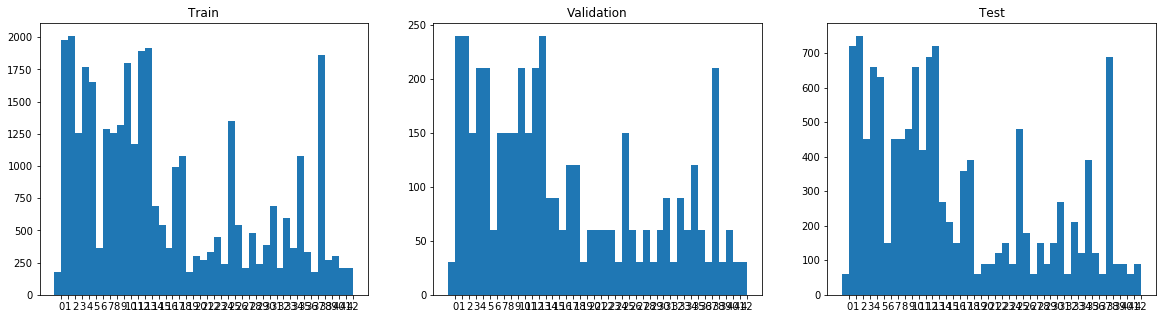

180


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

from collections import Counter

# to plot class distribution
def plot_histogram(c):
    labels, values = zip(*c.items())
    indexes = np.arange(len(labels))
    width = 1
    plt.bar(indexes, values, width)
    plt.xticks(indexes + width * 0.5, labels)

# get class distributions in each set
c_train = Counter(y_train)
c_valid = Counter(y_valid)
c_test = Counter(y_test)

fig = plt.figure(figsize=(20,5))

a=fig.add_subplot(1,3,1)
plot_histogram(c_train)
a.set_title('Train')

a=fig.add_subplot(1,3,2)
plot_histogram(c_valid)
a.set_title('Validation')

a=fig.add_subplot(1,3,3)
plot_histogram(c_test)
a.set_title('Test')

plt.show()

print(c_train[0])

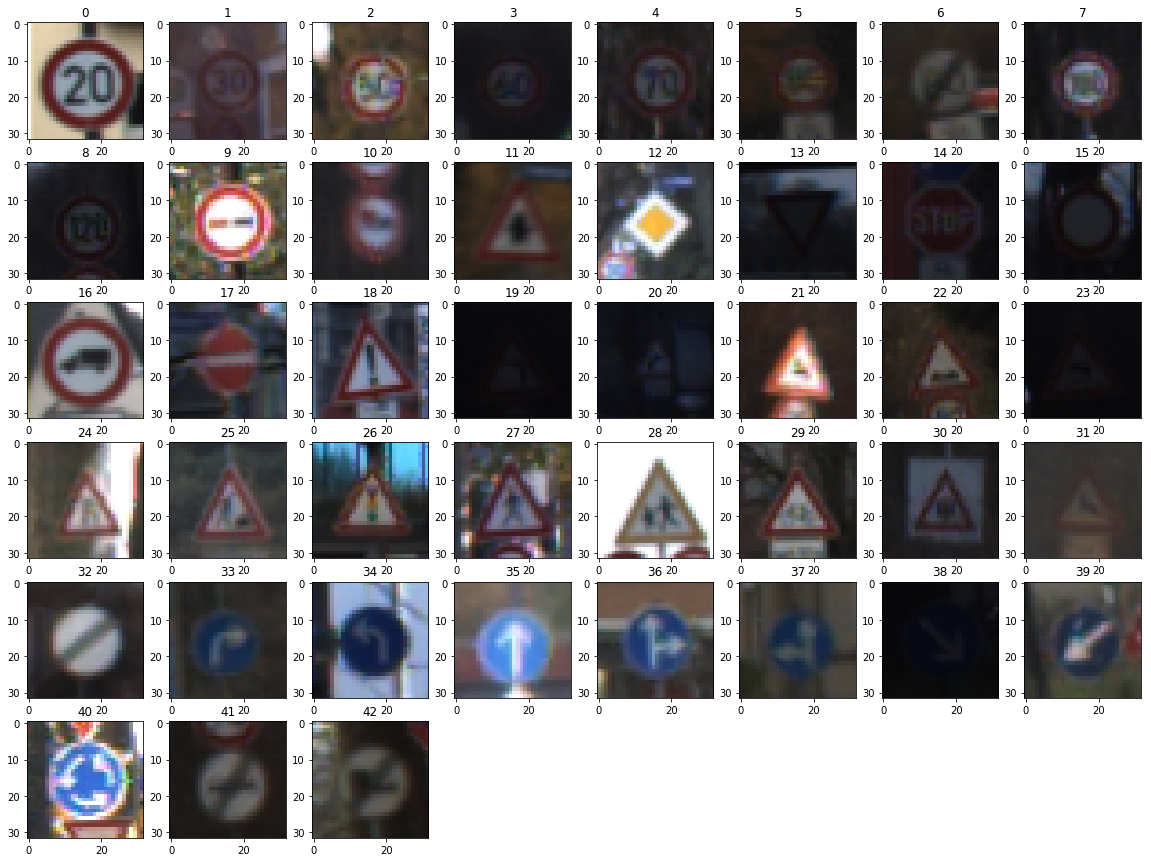

In [84]:
# visualize images for each class
import math

def get_sample(class_id):
    for i in range(len(y_train)):
        if y_train[i]==class_id:
            return X_train[i]

maxinrow = 8
rows = math.ceil(n_classes/maxinrow)
row = 1
col = 1

fig = plt.figure(figsize=(20,15))

for i in range(n_classes):
    X = get_sample(i)
    idx = i+1
    a=fig.add_subplot(rows,maxinrow,idx)
    a.set_title(i)
    imgplot = plt.imshow(X)

----

## Step 2: Design and Test a Model Architecture

Uses the LeNet-5 implementation trying various optimizations:
- Network architecture
- Preprocessing (normalization, rgb to grayscale, etc)
- Balancing Number of examples per label (some have more than others).
- Augment with more data



### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data.

Before this, fix under-represented classes using data augmentation.

In [85]:

# Before applying grayscale and normalization, first fix under-represented classes

# Approach :
# Take average frequency (=AVG) of all classes.
# For under-represented classes, replicate their samples to raise their frequency upto the average
#
# Specifically, if class C has freq f, copy its f samples * AVG/f times

# find avg freq
labels, values = zip(*c_train.items())
avg_freq = np.mean(values)

copies_of_features = []
copies_of_labels = []

# raise under-represented classes' frequency to average
for label,value in c_train.most_common():
    if value < avg_freq:
        print("label %s is under-represented (%d)" % (label,value))
        # get all indices of this label
        indices = [ii for ii, x in enumerate(y_train) if x == label]
        # get all the image samples having this label
        features = [X_train[ii] for ii in indices]
        labels = [y_train[ii] for ii in indices] # this is just the label repeated

        assert(value==len(features))
        
        num_replicas = avg_freq//len(features) - 1
        print("need to add %d replicas" % num_replicas)

        # replicate these images and labels - to be eventually added to the training set
        copies_of_features.extend(features*num_replicas)
        copies_of_labels.extend(labels*num_replicas)

        print("copies are now of size %d and %d" % (len(copies_of_features),len(copies_of_labels)))


label 14 is under-represented (690)
need to add 0 replicas
copies are now of size 0 and 0
label 31 is under-represented (690)
need to add 0 replicas
copies are now of size 0 and 0
label 33 is under-represented (599)
need to add 0 replicas
copies are now of size 0 and 0
label 15 is under-represented (540)
need to add 0 replicas
copies are now of size 0 and 0
label 26 is under-represented (540)
need to add 0 replicas
copies are now of size 0 and 0
label 28 is under-represented (480)
need to add 0 replicas
copies are now of size 0 and 0
label 23 is under-represented (450)
need to add 0 replicas
copies are now of size 0 and 0
label 30 is under-represented (390)
need to add 1 replicas
copies are now of size 390 and 390
label 6 is under-represented (360)
need to add 1 replicas
copies are now of size 750 and 750
label 16 is under-represented (360)
need to add 1 replicas
copies are now of size 1110 and 1110
label 34 is under-represented (360)
need to add 1 replicas
copies are now of size 1470 

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py:33: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py:34: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [86]:
# extend the training set by these replicated samples

from sklearn.utils import shuffle

copy_f = np.array(copies_of_features)
copy_l = np.array(copies_of_labels)

extended_X_train = np.concatenate((X_train,copy_f),axis=0)
extended_y_train = np.concatenate((y_train,copy_l),axis=0)

print(np.shape(extended_X_train))
print(np.shape(extended_y_train))

# shuffle the training set
X_train, y_train = shuffle(extended_X_train,extended_y_train)

(42329, 32, 32, 3)
(42329,)


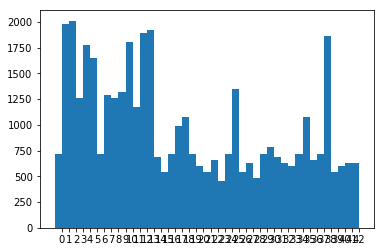

In [87]:
# see distribution again
c_train = Counter(y_train)
plot_histogram(c_train)

Done


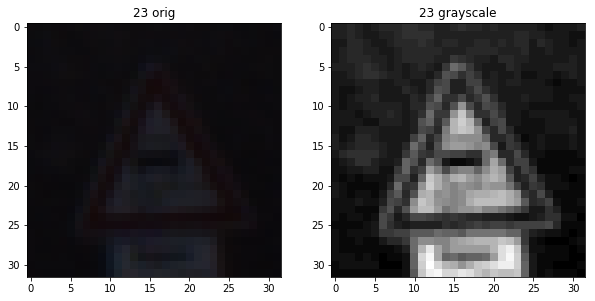

In [96]:

# Now apply grayscale and normalization

import cv2

def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def normalize(img):
    return (np.array(img, dtype=np.float32)-128)/128

# visualize impact of grayscaling
fig = plt.figure(figsize=(10,5))
test = get_sample(23)
gray_test = grayscale(test)
a=fig.add_subplot(1,2,1)
plt.imshow(test)
a.set_title('23 orig')
a=fig.add_subplot(1,2,2)
plt.imshow(gray_test,cmap='gray')
a.set_title('23 grayscale')


def preprocess(X):

    processed_X = np.zeros(np.shape(X)[:3] + (1,))
    
    for i in range(len(X)):
        gray = grayscale(X[i])
        processed_X[i] = normalize(gray[:,:,None])

    return processed_X

X_train_norm = preprocess(X_train)
X_valid_norm = preprocess(X_valid)
X_test_norm = preprocess(X_test)

print("Done")

## Model Architecture

In [1]:

import tensorflow as tf

def LeNet_for_traffic_signs(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = tf.contrib.layers.flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [74]:
# Setup inputs to model

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

In [75]:
# Set hyperparams

EPOCHS = 30
BATCH_SIZE = 128
rate = 0.001

In [76]:
# Setup training
logits = LeNet_for_traffic_signs(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [77]:
# Setup evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [78]:
### Train model here.

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_norm)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_norm, y_train = shuffle(X_train_norm, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_norm[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid_norm, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.725

EPOCH 2 ...
Validation Accuracy = 0.852

EPOCH 3 ...
Validation Accuracy = 0.858

EPOCH 4 ...
Validation Accuracy = 0.891

EPOCH 5 ...
Validation Accuracy = 0.883

EPOCH 6 ...
Validation Accuracy = 0.878

EPOCH 7 ...
Validation Accuracy = 0.901

EPOCH 8 ...
Validation Accuracy = 0.904

EPOCH 9 ...
Validation Accuracy = 0.898

EPOCH 10 ...
Validation Accuracy = 0.903

EPOCH 11 ...
Validation Accuracy = 0.919

EPOCH 12 ...
Validation Accuracy = 0.897

EPOCH 13 ...
Validation Accuracy = 0.910

EPOCH 14 ...
Validation Accuracy = 0.913

EPOCH 15 ...
Validation Accuracy = 0.923

EPOCH 16 ...
Validation Accuracy = 0.916

EPOCH 17 ...
Validation Accuracy = 0.921

EPOCH 18 ...
Validation Accuracy = 0.932

EPOCH 19 ...
Validation Accuracy = 0.924

EPOCH 20 ...
Validation Accuracy = 0.913

EPOCH 21 ...
Validation Accuracy = 0.929

EPOCH 22 ...
Validation Accuracy = 0.933

EPOCH 23 ...
Validation Accuracy = 0.931

EPOCH 24 ...
Validation Accura

In [55]:
# Test!

with tf.Session() as sess:
    #saver.restore(sess, tf.train.latest_checkpoint('.'))
    saver.restore(sess, './lenet')

    test_accuracy = evaluate(X_test_norm, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.911


---

## Step 3: Test a Model on New Images

We download five pictures of German traffic signs from the web and use the model to predict the traffic sign type.

(`signnames.csv` contains mappings from the class id (integer) to the actual sign name.)

### Load and Output the Images

In [56]:
### Load the images and plot them here.
import matplotlib.image as mpimg

image_names = ['downloaded_images/20kmph.jpg', 'downloaded_images/no_entry.jpg', 'downloaded_images/stop.jpg', 'downloaded_images/children_crossing.jpg', 'downloaded_images/right_turn.jpg']
batch_x = []
batch_y = [0, 17, 14, 28, 33]

for img in image_names:
    image = mpimg.imread(img)
    #printing out some stats and plotting
    print('got img %s with dimensions: %r'% (img,image.shape))
    #plt.imshow(img)
    gray = grayscale(image)
    processed_x = normalize(gray[:,:,None])
    batch_x.append(processed_x)

print(np.shape(batch_x))

got img downloaded_images/20kmph.jpg with dimensions: (32, 32, 3)
got img downloaded_images/no_entry.jpg with dimensions: (32, 32, 3)
got img downloaded_images/stop.jpg with dimensions: (32, 32, 3)
got img downloaded_images/children_crossing.jpg with dimensions: (32, 32, 3)
got img downloaded_images/right_turn.jpg with dimensions: (32, 32, 3)
(5, 32, 32, 1)


### Predict the Sign Type for Each Image

In [57]:
### Run the predictions here and use the model to output the prediction for each image.

with tf.Session() as sess:
    saver.restore(sess, './lenet')
    predicted_classes = sess.run(tf.argmax(logits,1), feed_dict={x: batch_x, y: batch_y})
    print(predicted_classes)

[14 17 14 23 33]


### Analyze Performance

In [58]:
### Calculate the accuracy for these 5 new images. 
with tf.Session() as sess:
    saver.restore(sess, './lenet')
    output = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
    print(output)

0.6


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limiting to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) is helpful here. 



In [59]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 

with tf.Session() as sess:
    saver.restore(sess, './lenet')
    output = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k=5), feed_dict={x: batch_x, y: batch_y})    
    probs = output[0]
    classes = output[1]
    print("Predicted classes:")
    print(classes)
    print("Probability distribution of predicted classes:")    
    print(probs)


Predicted classes:
[[14 29 31 28  0]
 [17  3  9 26 14]
 [14  3 38 18  1]
 [23 18 29 25 11]
 [33 25 30 19 11]]
Probability distribution of predicted classes:
[[  8.43907773e-01   1.48759544e-01   3.58620076e-03   3.14556225e-03
    4.89243539e-04]
 [  1.00000000e+00   2.30943834e-10   1.05070369e-10   3.38084769e-11
    1.87698624e-11]
 [  9.91843164e-01   5.71588799e-03   9.71565605e-04   5.42865368e-04
    5.20251924e-04]
 [  9.90279615e-01   9.64623038e-03   5.40953260e-05   1.45953445e-05
    5.19211335e-06]
 [  9.99987125e-01   1.26067025e-05   2.69424049e-07   2.75075362e-09
    2.47387621e-09]]


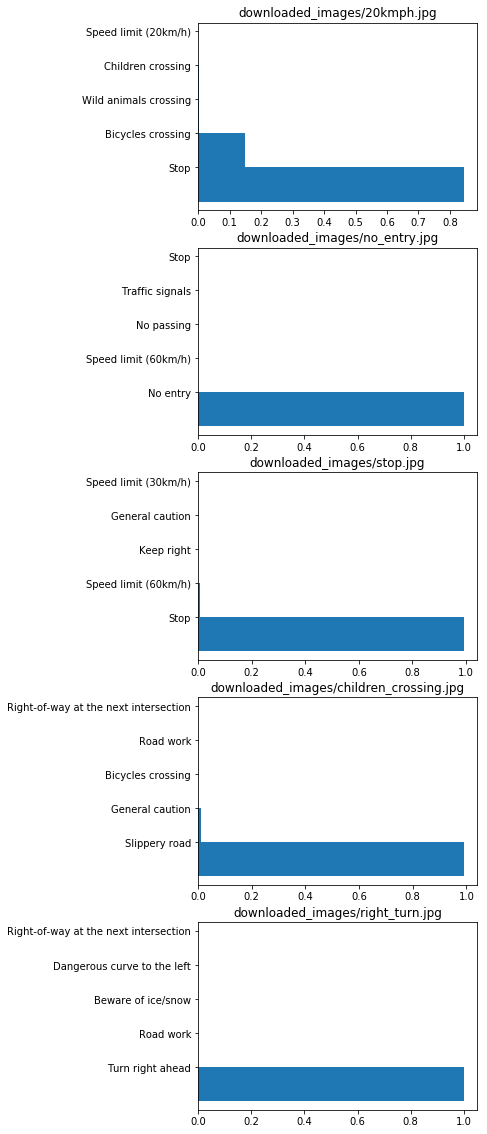

In [60]:
# Visualize probability distribution of predicted classes

import csv

def get_sign_dict():
    with open('./signnames.csv', mode='r') as infile:
        reader = csv.reader(infile)
        mydict = {rows[0]:rows[1] for rows in reader}
    return mydict

d = get_sign_dict()

fig = plt.figure(figsize=(5,20))

for i in range(len(batch_x)):
    labels = [d[str(class_id)] for class_id in classes[i]] 
    values = probs[i]
    indexes = np.arange(len(labels))
    width = 1
    
    a=fig.add_subplot(len(batch_x),1,i+1)

    plt.barh(indexes, values, width)
    plt.yticks(indexes + width * 0.5, labels)
    
    a.set_title(image_names[i])
